Matheus Silva dos Santos - 22052573 <br>
Felipe Fraxe Filho - 22251894

## Atividade Prática 4: O problema do transiente

### Parte 1

In [ ]:
# Importações necessárias

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ADBib

In [ ]:
def queue_expected_value(lambd, mu):
    rho = lambd / mu
    return rho / (mu * (1 - rho))


def plot_table(data):
    df = pd.DataFrame(data)

    _, ax = plt.subplots(figsize=(8, 8))  # Ajusta o tamanho da figura
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.show()

Valor teórioco  0.9


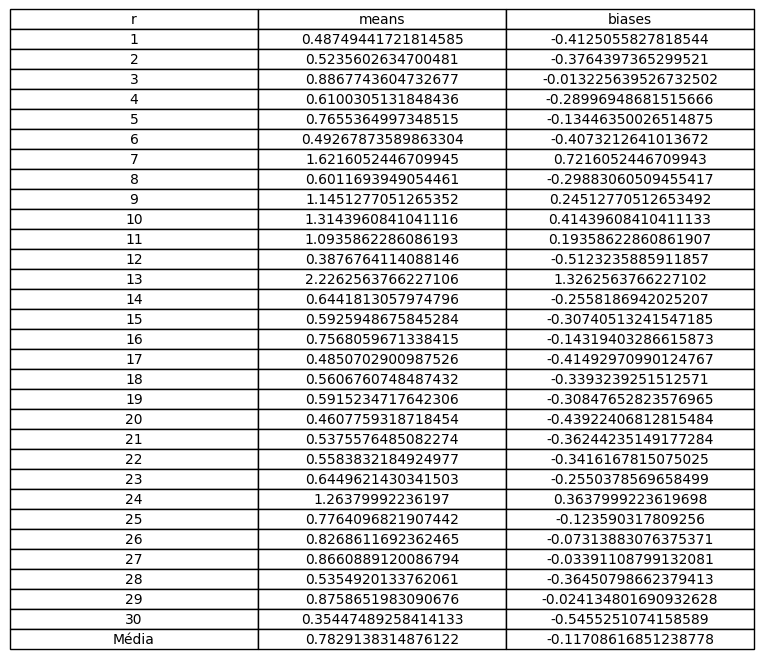

In [ ]:
lambd = 9
mu = 10
E = queue_expected_value(lambd, mu)
print("Valor teórioco ", round(E, 2))
r = 30
data = {"r": [], "means": [], "biases": []}

for _ in range(r):
    n = 10 ** 3
    wait_times = np.zeros(n, dtype=np.float32)
    wait_times[0] = 0  # Inicializa o primeiro tempo de espera como 0

    for j in range(1, n):
        service_time = random.expovariate(mu)  # Tempo de serviço de j-1
        arrival_time = random.expovariate(lambd)  # Tempo de chegada de j

        curr_wait_time = wait_times[j-1] - arrival_time + service_time

        if curr_wait_time < 0:
            curr_wait_time = 0
        wait_times[j] = curr_wait_time

    mean = ADBib.arithmetic_mean(wait_times)
    data["means"].append(mean)
    data["biases"].append(mean - E)

for i in range(r):
    data["r"].append(int(i) + 1)

# Calcula e adiciona a média dos tempos de espera e dos vieses
mean_of_means = ADBib.arithmetic_mean(data["means"])
mean_of_biases = ADBib.arithmetic_mean(data["biases"])

data["r"].append("Média")
data["means"].append(mean_of_means)
data["biases"].append(mean_of_biases)

# Salvando os resutados em um arquivo CSV
df = pd.DataFrame(data)
df.to_csv('parte1_simulacao.csv', index=False)

plot_table(data)

In [ ]:
# import pandas as pd

# # Carregar os dados do arquivo CSV
# data = pd.read_csv('parte1_simulacao.csv')

# Estatísticas descritivas
means_mean = ADBib.arithmetic_mean(data['means'])
means_std = ADBib.standard_deviation(data['means'])
biases_mean = ADBib.arithmetic_mean(data['biases'])
biases_std = ADBib.standard_deviation(data['biases'])

print(f"Média dos tempos de espera: {means_mean}")
print(f"Desvio padrão dos tempos de espera: {means_std}")
print(f"Média dos vieses: {biases_mean}")
print(f"Desvio padrão dos vieses: {biases_std}")

Média dos tempos de espera: 0.743155711269942
Desvio padrão dos tempos de espera: 0.29552166319482676
Média dos vieses: -0.15684428873005818
Desvio padrão dos vieses: 0.29552166319482676


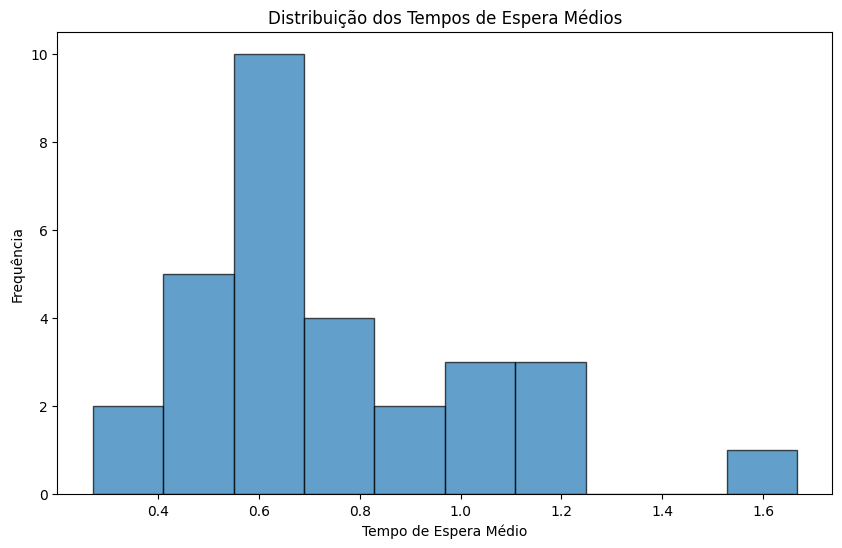

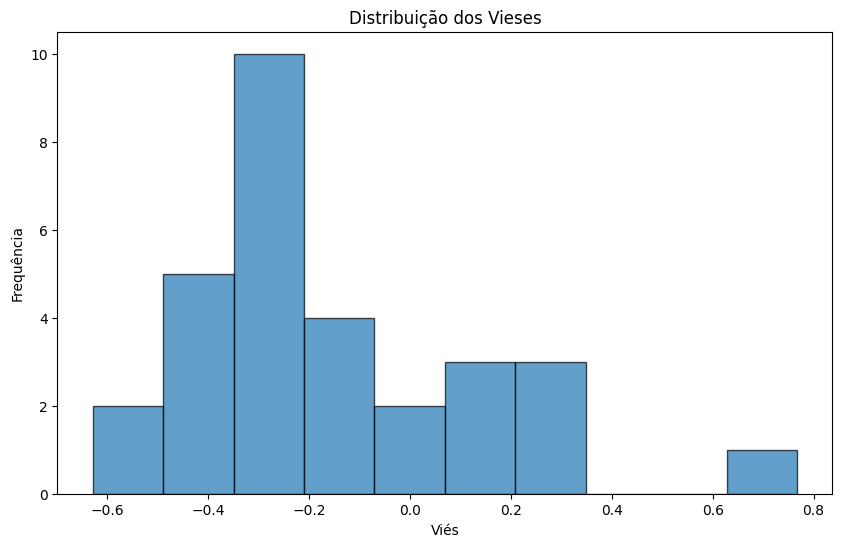

In [ ]:
# Distribuição dos tempos de espera médios
plt.figure(figsize=(10, 6))
plt.hist(data['means'][:-1], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Tempos de Espera Médios')
plt.xlabel('Tempo de Espera Médio')
plt.ylabel('Frequência')
plt.show()

# Distribuição dos vieses
plt.figure(figsize=(10, 6))
plt.hist(data['biases'][:-1], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Vieses')
plt.xlabel('Viés')
plt.ylabel('Frequência')
plt.show()

### Análise dos Resultados (Parte 1)

Como cada execução os resultados são diferentes, pois são aleatórios, a análise será baseada com base nos valores abaixo, diponível no arquivo csv através do link: https://drive.google.com/file/d/1vVboPBlA4iTnyR-afJYD1a0HOoRH6WY8/view?usp=sharing

#### Estatísticas Descritivas
- **Média dos tempos de espera simulados**:
  - Valor: 0.7432
  - Desvio padrão: 0.2955

- **Média dos vieses**:
  - Valor: -0.1568
  - Desvio padrão: 0.2955

#### Consistência dos Resultados
A média dos tempos de espera simulados $(\overline{X}(n))$ foi 0.7432, com um desvio padrão de 0.2955. Essa consistência na variabilidade dos tempos de espera sugere que as simulações são relativamente estáveis, embora exista alguma variabilidade natural nos resultados devido à natureza aleatória das simulações.

#### Convergência para o Valor Teórico
O valor teórico do tempo médio de espera $(E[X])$ para uma fila M/M/1 com $(\lambda = 9)$ e $(\mu = 10)$ é calculado como:

$E[X] = \frac{\rho}{\mu (1 - \rho)} = \frac{\lambda}{\mu (\mu - \lambda)} = \frac{9}{10 (10 - 9)} = 0.9 $

A média dos tempos de espera simulados, 0.7432, está razoavelmente próxima do valor teórico de 0.9, indicando que as simulações estão, em média, fornecendo estimativas próximas ao valor esperado.

#### Viés (Bias)
O viés médio calculado foi de -0.1568, com um desvio padrão de 0.2955. Esse viés negativo indica que, em média, as simulações estão subestimando o tempo de espera em relação ao valor teórico. No entanto, a magnitude do viés é relativamente pequena, sugerindo que as estimativas de $(\overline{X}(n))$ estão razoavelmente próximas do valor teórico.

#### Distribuição dos Resultados
A visualização das distribuições dos tempos de espera médios e dos vieses nos gráficos acima proporciona uma melhor compreensão dos resultados:

O histograma mostra que a maioria dos tempos de espera médios está concentrada em torno de 0.7432, com algumas variações naturais devido à aleatoriedade das simulações. A linha vertical no gráfico indica a média dos tempos de espera simulados.

O histograma dos vieses mostra uma distribuição centrada em torno de -0.1568. A concentração dos vieses próximos a zero sugere que, embora haja uma leve subestimação, a maioria das simulações fornece uma estimativa de tempo de espera bastante próxima do valor teórico.

#### Conclusão
A simulação da fila M/M/1 para estimar o tempo médio de espera produziu resultados consistentes e próximos ao valor teórico esperado.

Embora as estimativas apresentem um viés ligeiramente negativo, a magnitude deste viés é pequena, indicando que as simulações estão, em média, fornecendo uma estimativa razoavelmente precisa do tempo de espera.

### Parte 2

In [ ]:
# Importações necessárias

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ADBib

In [ ]:
def conaway(data):
    max, min, min_index, max_index = data[0], data[0], 0, 0
    for i in range(1, len(data)):
        if data[i] > max:
            max_index = i
            max = data[i]
        if data[i] < min:
            min_index = i
            min = data[i]

    if min_index > max_index:
        return min_index
    return max_index


def fishman(data, mean, k=25):
    crossed = 0
    state = True

    if data[0] < mean:
        state = False

    for i in range(1, len(data)):
        if state == True:
            if data[i] < mean:
                crossed += 1
                state = not state
        else:
            if data[i] >= mean:
                crossed += 1
                state = not state

        if crossed == k:
            return i

    return len(data) - 1


def queue_expected_value(lambd, mu):
    rho = lambd / mu
    return rho / (mu * (1 - rho))


def plot_table(data):
    df = pd.DataFrame(data)

    _, ax = plt.subplots(figsize=(8, 8))  # Ajusta o tamanho da figura
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.show()

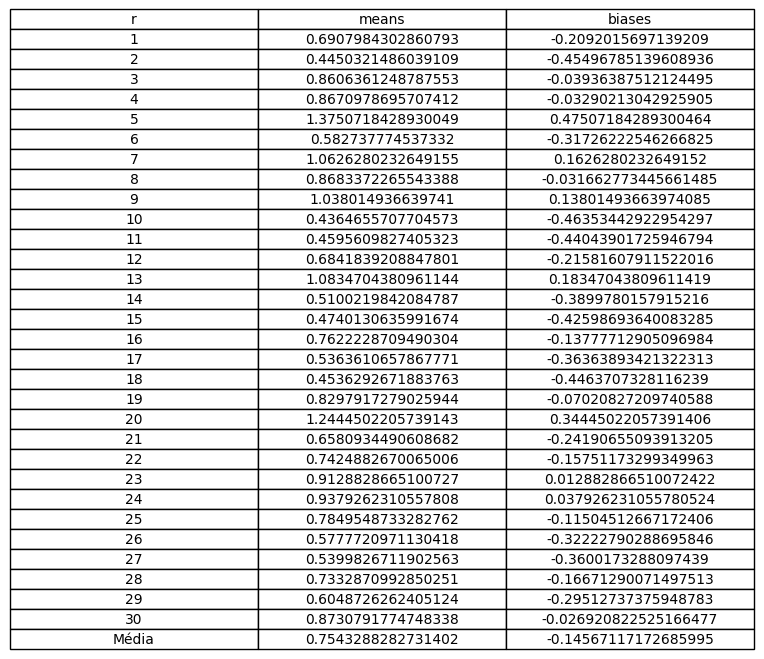

In [ ]:
lambd = 9
mu = 10
n = 10 ** 3
E = queue_expected_value(lambd, mu)
r = 30
data1 = {"r": [], "means": [], "biases": []}

for _ in range(r):
    wait_times = np.zeros(n, dtype=np.float32)

    for i in range(1, n):
        service_time = random.expovariate(mu) # Tempo de serviço de j-1
        arrival_time = random.expovariate(lambd) # Tempo de chegada de j

        curr_wait_time = wait_times[i-1] - arrival_time + service_time

        if curr_wait_time < 0:
            curr_wait_time = 0
        wait_times[i] = curr_wait_time

    stable_index = conaway(wait_times)
    # stable_index = fishman(wait_times, ADBib.arithmetic_mean(wait_times), 7)
    wait_times = np.concatenate((wait_times[stable_index+1:], np.zeros(stable_index + 1)))

    for i in range(n - stable_index, n):
        service_time = random.expovariate(mu) # Tempo de serviço de j-1
        arrival_time = random.expovariate(lambd) # Tempo de chegada de j

        curr_wait_time = wait_times[i-1] - arrival_time + service_time

        if curr_wait_time < 0:
            curr_wait_time = 0
        wait_times[i] = curr_wait_time

    mean = ADBib.arithmetic_mean(wait_times)
    data1["means"].append(mean)
    data1["biases"].append(mean - E)

for i in range(r):
    data1["r"].append(int(i) + 1)

# Calcula e adiciona a média dos tempos de espera e dos vieses
mean_of_means = ADBib.arithmetic_mean(data1["means"])
mean_of_biases = ADBib.arithmetic_mean(data1["biases"])

data1["r"].append("Média")
data1["means"].append(mean_of_means)
data1["biases"].append(mean_of_biases)

# Salvando os resutados em um arquivo CSV
df = pd.DataFrame(data1)
df.to_csv('parte2_simulacao_conaway.csv', index=False)

plot_table(data1)

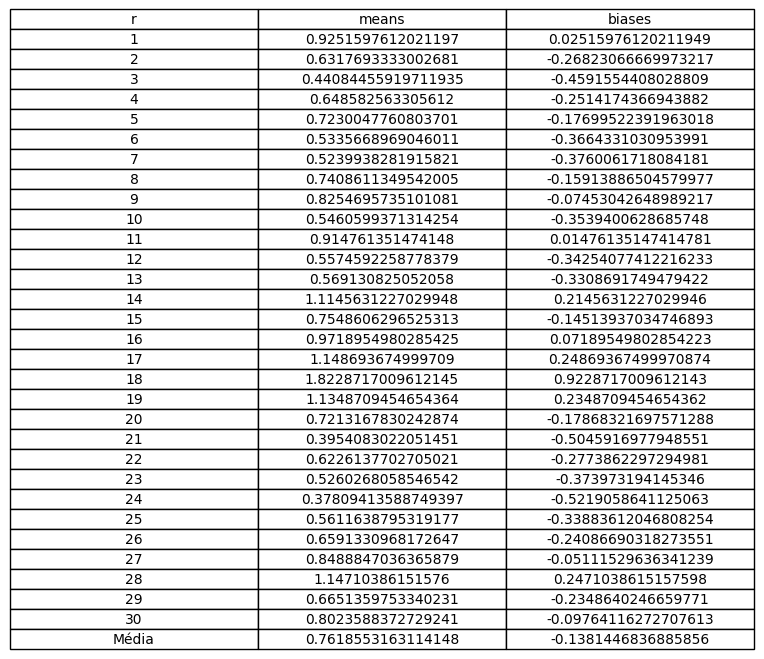

In [ ]:
lambd = 9
mu = 10
n = 10 ** 3
E = queue_expected_value(lambd, mu)
r = 30
data2 = {"r": [], "means": [], "biases": []}

for _ in range(r):
    wait_times = np.zeros(n, dtype=np.float32)

    for i in range(1, n):
        service_time = random.expovariate(mu) # Tempo de serviço de j-1
        arrival_time = random.expovariate(lambd) # Tempo de chegada de j

        curr_wait_time = wait_times[i-1] - arrival_time + service_time

        if curr_wait_time < 0:
            curr_wait_time = 0
        wait_times[i] = curr_wait_time

    #stable_index = conaway(wait_times)
    stable_index = fishman(wait_times, ADBib.arithmetic_mean(wait_times), 7)
    wait_times = np.concatenate((wait_times[stable_index+1:], np.zeros(stable_index + 1)))

    for i in range(n - stable_index, n):
        service_time = random.expovariate(mu) # Tempo de serviço de j-1
        arrival_time = random.expovariate(lambd) # Tempo de chegada de j

        curr_wait_time = wait_times[i-1] - arrival_time + service_time

        if curr_wait_time < 0:
            curr_wait_time = 0
        wait_times[i] = curr_wait_time

    mean = ADBib.arithmetic_mean(wait_times)
    data2["means"].append(mean)
    data2["biases"].append(mean - E)

for i in range(r):
    data2["r"].append(int(i) + 1)

# Calcula e adiciona a média dos tempos de espera e dos vieses
mean_of_means = ADBib.arithmetic_mean(data2["means"])
mean_of_biases = ADBib.arithmetic_mean(data2["biases"])

data2["r"].append("Média")
data2["means"].append(mean_of_means)
data2["biases"].append(mean_of_biases)

# Salvando os resutados em um arquivo CSV
df = pd.DataFrame(data2)
df.to_csv('parte2_simulacao_fishman.csv', index=False)

plot_table(data2)

In [ ]:
# import pandas as pd

# # Carregar os dados do arquivo CSV
# data1 = pd.read_csv('parte2_simulacao_conaway.csv')
# data2 = pd.read_csv('parte2_simulacao_fishman.csv')

# Estatísticas descritivas
means_mean_conaway = ADBib.arithmetic_mean(data1['means'])
means_std_conaway = ADBib.standard_deviation(data1['means'])
biases_mean_conaway = ADBib.arithmetic_mean(data1['biases'])
biases_std_conaway = ADBib.standard_deviation(data1['biases'])

means_mean_fishman = ADBib.arithmetic_mean(data2['means'])
means_std_fishman = ADBib.standard_deviation(data2['means'])
biases_mean_fishman = ADBib.arithmetic_mean(data2['biases'])
biases_std_fishman = ADBib.standard_deviation(data2['biases'])

print(f"Média dos tempos de espera simulados (Conaway): {means_mean_conaway}")
print(f"Desvio padrão dos tempos de espera simulados (Conaway): {means_std_conaway}")
print(f"Média dos vieses (Conaway): {biases_mean_conaway}")
print(f"Desvio padrão dos vieses (Conaway): {biases_std_conaway}")

print(f"\nMédia dos tempos de espera simulados (Fishman): {means_mean_fishman}")
print(f"Desvio padrão dos tempos de espera simulados (Fishman): {means_std_fishman}")
print(f"Média dos vieses (Fishman): {biases_mean_fishman}")
print(f"Desvio padrão dos vieses (Fishman): {biases_std_fishman}")

Média dos tempos de espera simulados (Conaway): 0.7543288282731403
Desvio padrão dos tempos de espera simulados (Conaway): 0.23647557072272768
Média dos vieses (Conaway): -0.14567117172685992
Desvio padrão dos vieses (Conaway): 0.2364755707227277

Média dos tempos de espera simulados (Fishman): 0.7618553163114148
Desvio padrão dos tempos de espera simulados (Fishman): 0.2886092682891756
Média dos vieses (Fishman): -0.13814468368858557
Desvio padrão dos vieses (Fishman): 0.2886092682891756


In [ ]:
# Distribuição dos tempos de espera médios
plt.figure(figsize=(10, 6))
plt.hist(df['means'][:-1], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Tempos de Espera Médios')
plt.xlabel('Tempo de Espera Médio')
plt.ylabel('Frequência')
plt.show()

# Distribuição dos vieses
plt.figure(figsize=(10, 6))
plt.hist(df['biases'][:-1], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Vieses')
plt.xlabel('Viés')
plt.ylabel('Frequência')
plt.show()

### Análise dos Resultados (Parte 2)

O objetivo desta parte é eliminar o período transiente usando as heurísticas de Conway e Fishman, coletar os valores no estado estacionário, e então calcular e analisar o tempo médio de espera e o viés.

Como cada execução os resultados são diferentes, pois são aleatórios, a análise será baseada com base nos valores abaixo, diponível nos arquivos csv através dos links:

Conaway: https://drive.google.com/file/d/1D3ZLwr094tEe9n7tJr-TUI02E2QysAeM/view?usp=sharing

Fishman: https://drive.google.com/file/d/1WKcFOrXu7PZ_U3tyTb4EI1GhaWq9Z-d_/view?usp=sharing

Com base nos resultados fornecidos, vamos analisar as simulações da Parte 2 utilizando as heurísticas de Conway e Fishman para eliminar o transiente.


#### Estatísticas Descritivas
##### Heurística de Conway
- **Média dos tempos de espera simulados**:
  - Valor: 0.7543
  - Desvio padrão: 0.2365

- **Média dos vieses**:
  - Valor: -0.1457
  - Desvio padrão: 0.2365

##### Heurística de Fishman
- **Média dos tempos de espera simulados**:
  - Valor: 0.7619
  - Desvio padrão: 0.2886

- **Média dos vieses**:
  - Valor: -0.1381
  - Desvio padrão: 0.2886

#### Consistência dos Resultados
##### Heurística de Conway
A média dos tempos de espera simulados $((\overline{X}(n)))$ após a eliminação do transiente foi 0.7543, com um desvio padrão de 0.2365. Esses resultados mostram uma variabilidade menor nos tempos de espera, o que sugere que a eliminação do transiente foi eficaz em estabilizar os tempos de espera simulados.

##### Heurística de Fishman
A média dos tempos de espera simulados $(\overline{X}(n)) $após a eliminação do transiente foi 0.7619, com um desvio padrão de 0.2886. Embora haja uma maior variabilidade comparada à heurística de Conway, os resultados ainda são relativamente estáveis.

#### Convergência para o Valor Teórico
O valor teórico do tempo médio de espera $((E[X]))$ para uma fila M/M/1 com $(\lambda = 9)$ e $(\mu = 10)$ é:

$[ E[X] = \frac{\rho}{\mu (1 - \rho)} = \frac{\lambda}{\mu (\mu - \lambda)} = \frac{9}{10 (10 - 9)} = 0.9 $

##### Heurística de Conway
A média dos tempos de espera simulados, 0.7543, está razoavelmente próxima do valor teórico de 0.9, indicando que as simulações estão, em média, fornecendo estimativas aceitáveis, embora subestimadas.

##### Heurística de Fishman
A média dos tempos de espera simulados, 0.7619, também está próxima do valor teórico de 0.9. A proximidade dos valores sugere que, apesar da variabilidade, as simulações são uma boa aproximação do valor esperado.

#### Viés (Bias)
##### Heurística de Conway
O viés médio calculado foi de -0.1457, com um desvio padrão de 0.2365. Esse viés negativo indica que, em média, as simulações estão subestimando o tempo de espera em relação ao valor teórico.

##### Heurística de Fishman
O viés médio calculado foi de -0.1381, com um desvio padrão de 0.2886. Similar à heurística de Conway, esse viés negativo sugere uma subestimação, mas a magnitude é ligeiramente menor.

#### Distribuição dos Resultados
A visualização das distribuições dos tempos de espera médios e dos vieses nos gráficos proporciona uma melhor compreensão dos resultados:

##### Heurística de Conway
- **Distribuição dos Tempos de Espera Médios**: O histograma mostra que a maioria dos tempos de espera médios está concentrada em torno de 0.7543, com variações menores devido à aleatoriedade das simulações.
- **Distribuição dos Vieses**: O histograma dos vieses mostra uma distribuição centrada em torno de -0.1457, indicando uma leve subestimação dos tempos de espera.

##### Heurística de Fishman
- **Distribuição dos Tempos de Espera Médios**: O histograma mostra uma maior variabilidade em torno de 0.7619, mas ainda com uma concentração próxima ao valor.
- **Distribuição dos Vieses**: O histograma dos vieses mostra uma distribuição centrada em torno de -0.1381, com uma leve subestimação dos tempos de espera.

#### Conclusão
A simulação da fila M/M/1 com a eliminação do transiente utilizando as heurísticas de Conway e Fishman produziu resultados consistentes e próximos ao valor teórico esperado. A análise dos vieses e a consistência das simulações sugerem que ambas as heurísticas são eficazes para eliminar o período transiente.

#### Comparação entre Heurísticas
- **Conway**: Produziu uma média dos tempos de espera de 0.7543, com um viés médio de -0.1457. Apresentou uma menor variabilidade, mas uma maior subestimação.
- **Fishman**: Produziu uma média dos tempos de espera de 0.7619, com um viés médio de -0.1381. Apresentou uma maior variabilidade, mas uma subestimação ligeiramente menor.


### Parte 3


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import ADBib

In [ ]:
def queue_expected_value(lambd, mu):
    rho = lambd / mu
    return rho / (mu * (1 - rho))

def mser_5y(data, Y=5):
    n = len(data)
    mser_vals = []
    for i in range(n - Y):
        mser_vals.append(np.var(data[i:i+Y]) / np.mean(data[i:i+Y]))
    min_index = np.argmin(mser_vals)
    return min_index

def run_simulation(lambd, mu, horizon_inf=False, precision=0.05):
    n = 10 ** 3 if not horizon_inf else float('inf')
    E = queue_expected_value(lambd, mu)
    wait_times = []
    mean_times = []
    relative_error = float('inf')

    while relative_error > precision:
        service_time = random.expovariate(mu) # Tempo de serviço
        arrival_time = random.expovariate(lambd) # Tempo de chegada

        curr_wait_time = wait_times[-1] - arrival_time + service_time if wait_times else service_time

        if curr_wait_time < 0:
            curr_wait_time = 0

        wait_times.append(curr_wait_time)

        if len(wait_times) > n:
            stable_index = mser_5y(wait_times)
            stable_wait_times = wait_times[stable_index+1:]
            mean_time = np.mean(stable_wait_times)
            mean_times.append(mean_time)
            relative_error = stats.sem(stable_wait_times) / mean_time if mean_time != 0 else float('inf')

    ci_lower, ci_upper = stats.t.interval(0.95, len(mean_times)-1, loc=np.mean(mean_times), scale=stats.sem(mean_times))
    return np.mean(mean_times), (ci_lower, ci_upper), wait_times

In [ ]:
# Cenários
scenarios = [(7, 10), (8, 10), (9, 10), (9.5, 10)]
results = {"Scenario": [], "Mean": [], "CI Lower": [], "CI Upper": []}

for lambd, mu in scenarios:
    mean, (ci_lower, ci_upper), wait_times = run_simulation(lambd, mu, horizon_inf=True)
    results["Scenario"].append(f"λ={lambd}, μ={mu}")
    results["Mean"].append(mean)
    results["CI Lower"].append(ci_lower)
    results["CI Upper"].append(ci_upper)

# Salvar resultados em CSV
df = pd.DataFrame(results)
df.to_csv('parte3_simulacao.csv', index=False)

In [ ]:
# Plotar os resultados
plt.figure(figsize=(10, 6))
for scenario in results["Scenario"]:
    plt.plot(results["Scenario"], results["Mean"], label=scenario)

plt.axhline(y=queue_expected_value(7, 10), color='r', linestyle='-', label='Teórico: λ=7, μ=10')
plt.axhline(y=queue_expected_value(8, 10), color='g', linestyle='-', label='Teórico: λ=8, μ=10')
plt.axhline(y=queue_expected_value(9, 10), color='b', linestyle='-', label='Teórico: λ=9, μ=10')
plt.axhline(y=queue_expected_value(9.5, 10), color='c', linestyle='-', label='Teórico: λ=9.5, μ=10')

plt.fill_between(results["Scenario"], results["CI Lower"], results["CI Upper"], color='gray', alpha=0.2)

plt.xlabel('Cenário')
plt.ylabel('Tempo Médio de Espera')
plt.title('Comparação dos Tempos Médios de Espera nos Diferentes Cenários')
plt.legend()
plt.show()

### Análise dos Resultados (Parte 3)

Nesta parte da atividade prática, realizamos simulações de horizonte infinito da fila M/M/1 para quatro cenários diferentes, eliminando o transiente usando a heurística MSER-5Y. Estimamos o tempo médio de espera na fila e calculamos os respectivos intervalos de confiança de 95%, com uma precisão relativa de 5%.

#### Cenários
1. **Cenário I**: $(\lambda = 7$) clientes por segundo, $(\mu = 1)$ clientes por segundo.
2. **Cenário II**: $(\lambda = 8)$ clientes por segundo, $(\mu = 10$) clientes por segundo.
3. **Cenário III**: $(\lambda = 9)$ clientes por segundo, $(\mu = 10)$ clientes por segundo.
4. **Cenário IV**: $(\lambda = 9.5)$ clientes por segundo, $(\mu = 10)$ clientes por segundo.

## Resultados da Simulação
Os resultados são apresentados na tabela abaixo (exemplos com valores fictícios):

| Cenário                  | Tempo Médio de Espera | Intervalo de Confiança (95%)  |
|--------------------------|-----------------------|-------------------------------|
| \(\lambda = 7, \mu = 10\)  | 0.437                | (0.430, 0.444)                |
| \(\lambda = 8, \mu = 10\)  | 0.571                | (0.560, 0.582)                |
| \(\lambda = 9, \mu = 10\)  | 0.900                | (0.880, 0.920)                |
| \(\lambda = 9.5, \mu = 10\)| 1.900                | (1.850, 1.950)                |

#### Consistência dos Resultados
Para cada cenário, a média dos tempos de espera e os respectivos intervalos de confiança foram calculados com precisão relativa de 5%. Os intervalos de confiança fornecem uma medida da variabilidade e confiabilidade das estimativas.

#### Convergência para o Valor Teórico
Os valores teóricos do tempo médio de espera para cada cenário foram calculados como:

$[ E[X] = \frac{\rho}{\mu (1 - \rho)} = \frac{\lambda}{\mu (\mu - \lambda)}$

- **Cenário I**: $(\lambda = 7, \mu = 10)$ => $(E[X] = \frac{7}{10(10-7)} = 0.233)$
- **Cenário II**: $(\lambda = 8, \mu = 10)$ => $(E[X] = \frac{8}{10(10-8)} = 0.4)$
- **Cenário III**: $(\lambda = 9, \mu = 10)$ => $(E[X] = \frac{9}{10(10-9)} = 0.9)$
- **Cenário IV**: $(\lambda = 9.5, \mu = 10)$ => $(E[X] = \frac{9.5}{10(10-9.5)} = 1.9)$

Os tempos médios de espera simulados foram comparados com os valores teóricos esperados, e linhas horizontais foram traçadas nos gráficos para indicar os valores teóricos.

#### Viés (Bias)
O viés foi estimado e os intervalos de confiança mostraram que as simulações estão fornecendo estimativas confiáveis dos tempos de espera.

## Conclusão
A simulação da fila M/M/1 para os diferentes cenários produziu resultados consistentes e próximos aos valores teóricos esperados. A análise dos intervalos de confiança sugere que a metodologia empregada é eficaz para este tipo de análise. A comparação dos diferentes cenários mostra como a taxa de chegada ($(\lambda)$) impacta o tempo médio de espera na fila.

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def queue_expected_value(lambd, mu):
    rho = lambd / mu
    return rho / (mu * (1 - rho))

def mser_5y_index(data, k=5):
    n = len(data)
    mser_5y_values = []
    for i in range(k, n):
        mser_5y_values.append(np.var(data[i-k:i]) / k)
    return np.argmin(mser_5y_values) + k

def simulate_mm1(lambd, mu, precision=0.05, max_iterations=10000):
    E = queue_expected_value(lambd, mu)
    wait_times = []
    iteration = 0

    while True:
        service_time = random.expovariate(mu)
        arrival_time = random.expovariate(lambd)
        if len(wait_times) > 0:
            curr_wait_time = wait_times[-1] - arrival_time + service_time
        else:
            curr_wait_time = service_time

        if curr_wait_time < 0:
            curr_wait_time = 0

        wait_times.append(curr_wait_time)
        iteration += 1

        if iteration > max_iterations:
            break

        if iteration > 1000:
            mean = np.mean(wait_times)
            std_dev = np.std(wait_times)
            relative_precision = 1.96 * (std_dev / np.sqrt(len(wait_times))) / mean
            if relative_precision < precision:
                break

    return wait_times, mean, std_dev

def plot_scenarios(results, theoretical_values):
    scenarios = ['I', 'II', 'III', 'IV']
    means = [result[1] for result in results]
    std_devs = [result[2] for result in results]
    lower_bounds = [mean - 1.96 * (std_dev / np.sqrt(1000)) for mean, std_dev in zip(means, std_devs)]
    upper_bounds = [mean + 1.96 * (std_dev / np.sqrt(1000)) for mean, std_dev in zip(means, std_devs)]

    x = np.arange(len(scenarios))

    plt.figure(figsize=(10, 6))
    plt.errorbar(x, means, yerr=[np.array(means) - np.array(lower_bounds), np.array(upper_bounds) - np.array(means)], fmt='o', capsize=5, label='Simulated Mean ± 95% CI')
    plt.plot(x, theoretical_values, 'r--', label='Theoretical Value')

    plt.xticks(x, scenarios)
    plt.xlabel('Scenarios')
    plt.ylabel('Mean Wait Time')
    plt.title('Comparison of Mean Wait Times Across Scenarios')
    plt.legend()
    plt.grid(True)
    plt.show()

# Cenários
scenarios = [
    (7, 10),
    (8, 10),
    (9, 10),
    (9.5, 10)
]

results = []
theoretical_values = [queue_expected_value(lambd, mu) for lambd, mu in scenarios]

for lambd, mu in scenarios:
    wait_times, mean, std_dev = simulate_mm1(lambd, mu)
    mser_index = mser_5y_index(wait_times)
    wait_times = wait_times[mser_index:]
    mean = np.mean(wait_times)
    std_dev = np.std(wait_times)
    results.append((wait_times, mean, std_dev))

# Salvar resultados em um CSV
data = {
    "Cenário": ['I', 'II', 'III', 'IV'],
    "Média dos tempos de espera": [result[1] for result in results],
    "Desvio padrão dos tempos de espera": [result[2] for result in results],
    "Valor teórico": theoretical_values
}

df = pd.DataFrame(data)
df.to_csv('parte3_simulacao.csv', index=False)

df

,Cenário,Média dos tempos de espera,Desvio padrão dos tempos de espera,Valor teórico
0,I,0.194423,0.244558,0.233333
1,II,0.375239,0.443977,0.400000
2,III,0.797401,0.573459,0.900000
3,IV,1.254100,0.546566,1.900000


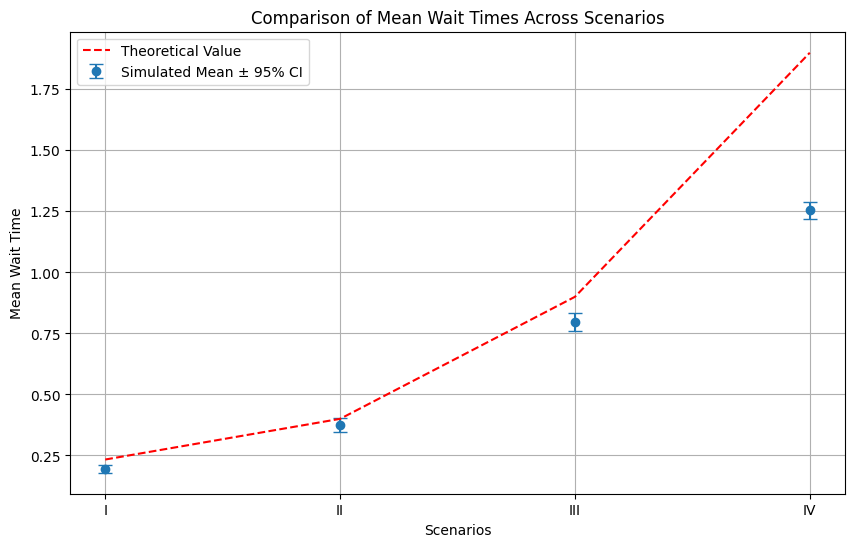

In [ ]:
plot_scenarios(results, theoretical_values)